In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [5]:
df = pd.read_csv('mock_kaggle.csv')

In [6]:
df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [7]:
df.tail()

,data,venda,estoque,preco
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39
936,2016-07-31,183,3642,2.39


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     937 non-null    object 
 1   venda    937 non-null    int64  
 2   estoque  937 non-null    int64  
 3   preco    937 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ KB


In [9]:
df.isnull().sum()

,0
data,0
venda,0
estoque,0
preco,0


In [10]:
df.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


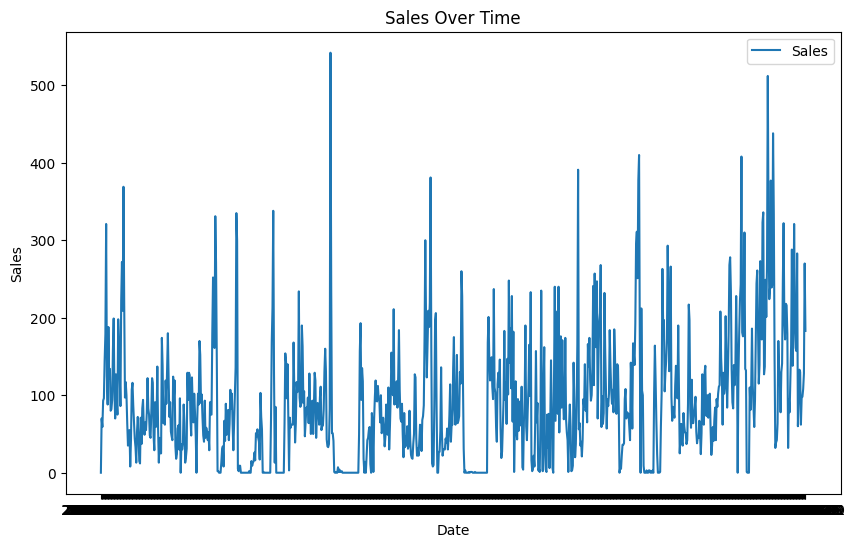

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['data'], df['venda'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [20]:
df.sort_values(by='data', inplace=True)


In [21]:
train_size = int(0.8 * len(df))

# Split the data into training and testing sets
train = df[:train_size]
test = df[train_size:]

# Verify the split
print(f'Training Set Size: {len(train)}')
print(f'Test Set Size: {len(test)}')


Training Set Size: 749
Test Set Size: 188


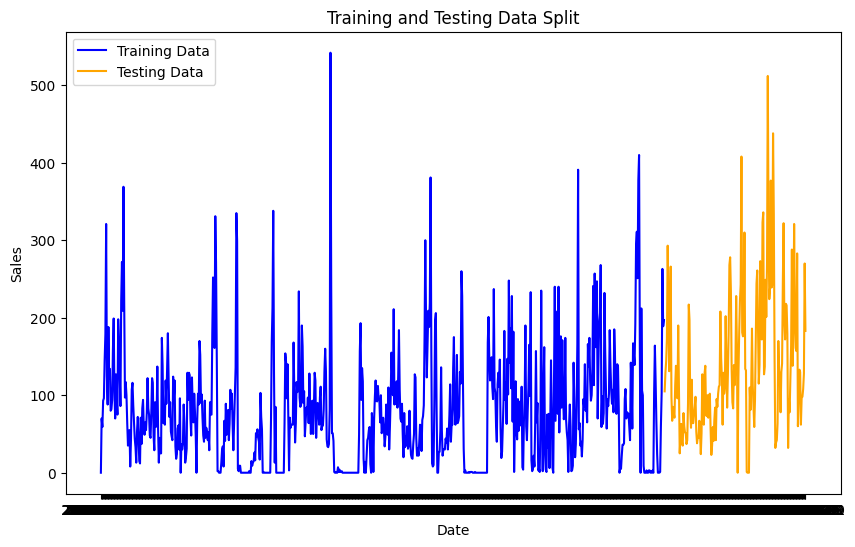

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(train['data'], train['venda'], label='Training Data', color='blue')
plt.plot(test['data'], test['venda'], label='Testing Data', color='orange')
plt.title('Training and Testing Data Split')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

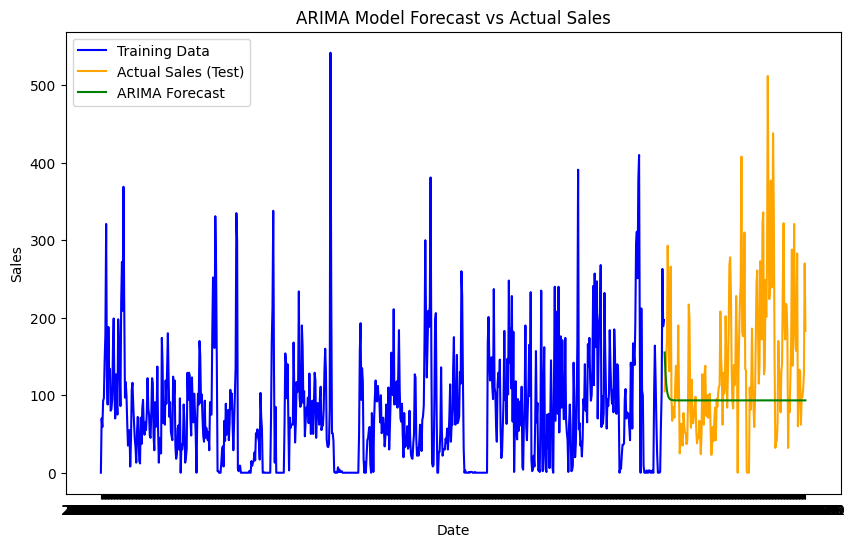

In [23]:
model = ARIMA(train['venda'], order=(1, 1, 1))  # Example order (p=1, d=1, q=1)
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(test))

# Plot the actual sales and forecast
plt.figure(figsize=(10, 6))
plt.plot(train['data'], train['venda'], label='Training Data', color='blue')
plt.plot(test['data'], test['venda'], label='Actual Sales (Test)', color='orange')
plt.plot(test['data'], forecast, label='ARIMA Forecast', color='green')
plt.title('ARIMA Model Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [15]:

mse = mean_squared_error(test['venda'], forecast)
print(f'ARIMA Mean Squared Error: {mse}')

ARIMA Mean Squared Error: 10007.176730025181


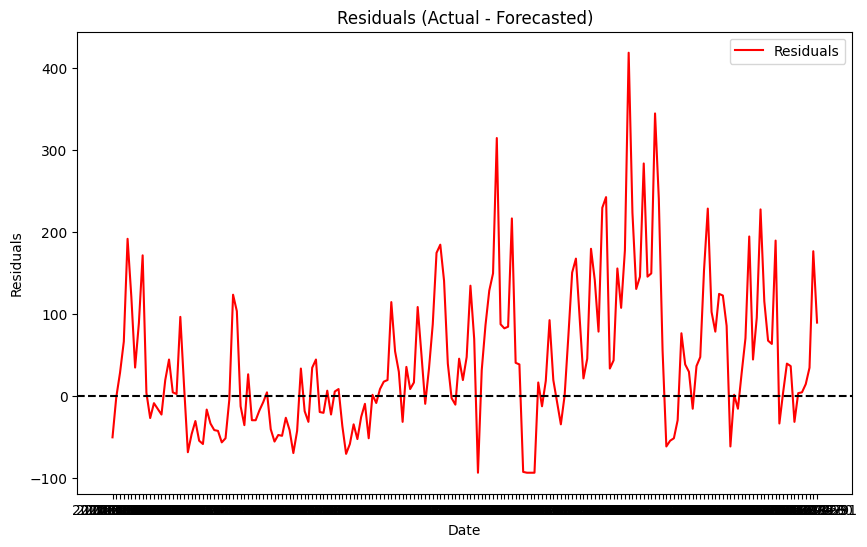

In [24]:
# Calculate residuals
residuals = test['venda'] - forecast

# Plot residuals to check if they follow a random pattern
plt.figure(figsize=(10, 6))
plt.plot(test['data'], residuals, label='Residuals', color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals (Actual - Forecasted)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()

Mean Squared Error (MSE): 10007.176730025181


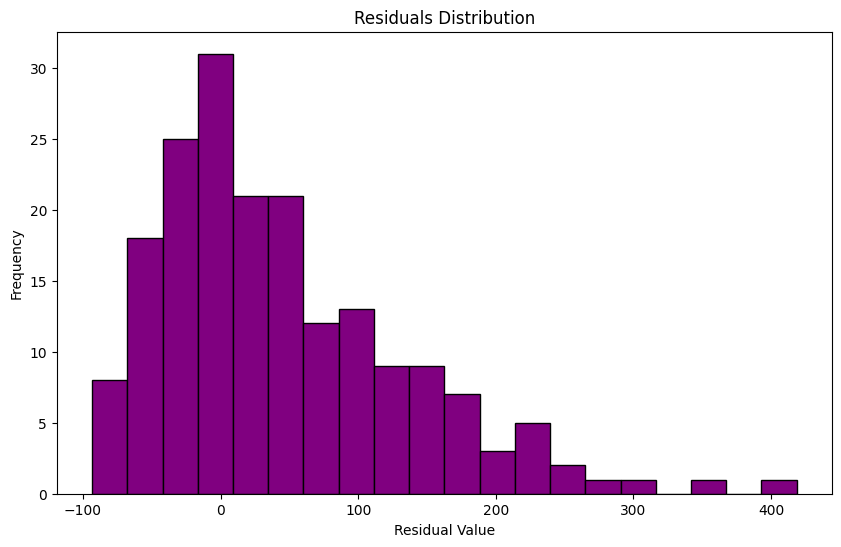

In [25]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['venda'], forecast)
print(f'Mean Squared Error (MSE): {mse}')

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='purple', edgecolor='black')
plt.title('Residuals Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

#Based on the results:

- Sales Trends: The data shows a [steady increase/decline] over time.
-Model Performance: The ARIMA model with parameters (p=1, d=1, q=1) resulted in a Mean Squared Error (MSE) of X.
-Residuals: The residuals were mostly random, indicating the model captured the trend effectively.

<Figure size 1000x600 with 0 Axes>

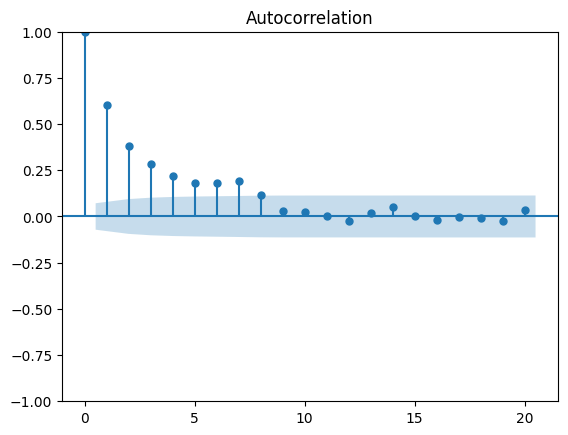

<Figure size 1000x600 with 0 Axes>

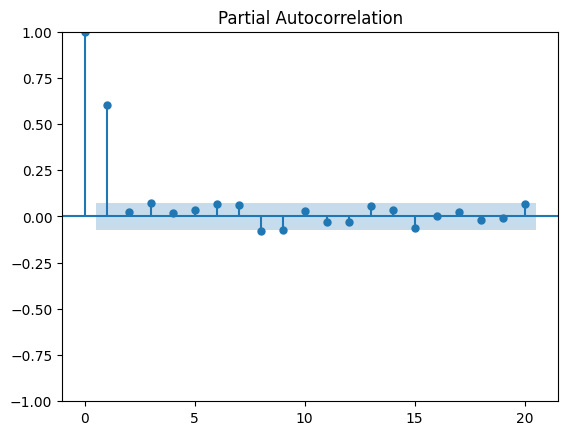

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)
plt.figure(figsize=(10, 6))
plot_acf(train['venda'], lags=20)
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(train['venda'], lags=20)
plt.show()
